This notebook replicates figures from Gao et al., 2018.

In [1]:
import datajoint as dj
from pipeline import ephys, behavior, subject, acquisition
import numpy as np
import matplotlib.pyplot as plt
from pipeline import get_spk_counts, get_trials, get_spk_times, get_psth
import scipy.signal as signal
import scipy.stats as ss
import datetime
import numpy.random as random
%matplotlib inline

Connecting root@db_gao2018:3306


## Figure 2c

In [2]:
def compute_mean_and_sem(fr):
    mean_fr = np.average(fr, axis=0)
    sem_fr = np.divide(np.std(fr, axis=0), np.sqrt(np.shape(fr)[0]))
    return mean_fr, sem_fr

In [3]:
# restrict to photo activation sessions
sessions = acquisition.Session & (behavior.TrialSetType & 'trial_set_type = "photo activation"')

# restrict to pyramidal cells, no light trials, only hit trials, trial number > 15
valid_cells = (ephys.UnitSelectivity & sessions & 
           (ephys.UnitSpikeTimes & 'unit_cell_type = "pyramidal"') & 
           'trial_condition = "Hit"' &
           'l_trial_number > 15' &
           'r_trial_number > 15' & 'selectivity=1')

# restrict to selective units
fr_diff, bins = valid_cells.fetch('psth_diff_test', 'bins')
fr_diff = np.array(fr_diff.tolist())


In [4]:
mean_fr, sem_fr = compute_mean_and_sem(fr_diff)

In [5]:
xlim = [-3, 2]
ylim = [-1, 4]
time_points = [-2.6, -1.3, 0]

Text(0, 0.5, 'Selectivity (spks/s)')

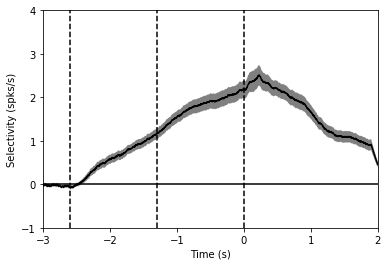

In [6]:

fig, ax = plt.subplots(1, 1, sharex=True)
for time_point in time_points:
    ax.axvline(x=time_point, color='black', linestyle='dashed')
ax.axhline(y=0, color='black')
ax.fill_between(bins[0], mean_fr+sem_fr, mean_fr-sem_fr, facecolor="gray")
ax.plot(bins[0], mean_fr, color="black")
ax.set_xlim(xlim[0], xlim[1])
ax.set_ylim(ylim[0], ylim[1])
ax.set_xlabel('Time (s)')
ax.set_ylabel('Selectivity (spks/s)')

## Figure 3f

In [17]:
# restrict to photo inhibition sessions
sessions = acquisition.Session & (behavior.TrialSetType & 'trial_set_type = "photo inhibition"')

# light off condition
light_off = ephys.UnitSelectivity & sessions & \
              (ephys.UnitSpikeTimes & 'unit_cell_type = "pyramidal"') &\
              'selectivity > 0' & 'trial_condition = "All"'
light_on = ephys.AlignedPsthStimOn & sessions & light_off &  'photo_stim_id="6"'& \
              (ephys.UnitSpikeTimes & 'unit_cell_type = "pyramidal"') & 'trial_condition = "All"'

fr_diff_off, bins = light_off.fetch('psth_diff_test', 'bins')

fr_diff_off = np.array(fr_diff_off.tolist())
fr_diff_on = np.array(fr_diff_on.tolist())

In [18]:
mean_fr_off, sem_fr_off = compute_mean_and_sem(fr_diff_off)
mean_fr_on, sem_fr_on = compute_mean_and_sem(fr_diff_on)

In [19]:
mean_fr = [mean_fr_off, mean_fr_on]
sem_fr = [sem_fr_off, sem_fr_on]

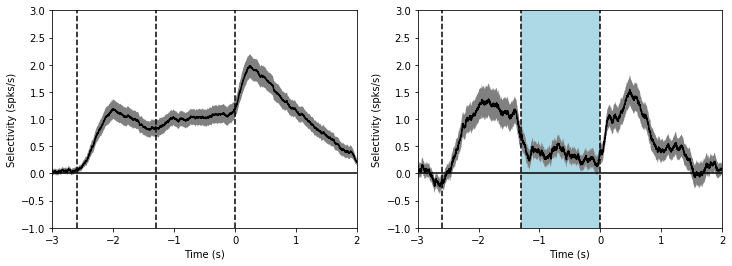

In [20]:
ylim = [-1, 3]
fig, axs = plt.subplots(1, 2, sharex=True, figsize=(12,4))
for ix, ax in enumerate(axs):
    for time_point in time_points:
        ax.axvline(x=time_point, color='black', linestyle='dashed')
    if ix == 1:
        ax.fill_between(time_points[1:], [ylim[0], ylim[0]], [ylim[1], ylim[1]], facecolor="lightblue")
    ax.axhline(y=0, color='black')
    ax.fill_between(bins[0], mean_fr[ix]+sem_fr[ix], mean_fr[ix]-sem_fr[ix], facecolor="gray")
    ax.plot(bins[0], mean_fr[ix], color="black")
    ax.set_xlim(xlim[0], xlim[1])
    ax.set_ylim(ylim[0], ylim[1])
    ax.set_xlabel('Time (s)')
    ax.set_ylabel('Selectivity (spks/s)')
    